# K-Nearest Neighbor Deconstructed
#### Application of Nearest Neighbor Search

As beginning Python developers and data scientists, we are introduced to the bevy of [libraries](https://stackoverflow.com/questions/18474784/what-exactly-is-a-python-library) that support our work like [Numpy](https://numpy.org/doc/), [SciPy](https://www.scipy.org/docs.html), [Pandas](https://pandas.pydata.org/docs/), and [SciKit-Learn](https://scikit-learn.org/stable/).  These librarys and their packages allow us to fast track our learning and workflow in parallel.  They remove barriers of entry into the technology industry and improve productivity for the beginner and experienced engineer.  

However, these out of the box solutions can be challenging to adapt and apply to individual business problems, especially.  One issue that only experience can solve is understanding what is happening under the hood when interfacing with a library - what can't we see on the screen.  

A good way to gain insight is to build your own [algorithm](https://legacy.python.org/workshops/2002-02/papers/15/index.htm) from scratch and then compare it to the library version.  This will allow you to deconstruct the algorithim:
- identify what data is and is not in it 
-how data structures are manipulated within 
-logical sequence 
-what mathmatical calculations are involved 

An additional benefit to buiding your own algorithim is that you have complete control over the code!  As your understanding of the algorithm, dataset, data structures, and python itself grows during the exercise (...and, it will), you can adjust the algorithm code itself to reflect your own optimization of knowledge and skill.



## Build a Classification System Using K-NN

####Understanding Classification

Imagine you have a mystery fruit in front of you.  You think it could either be a lemon or a lime, but your not too sure.  You know limes are small, round, and green, while lemons are usually large, oval-ish, and bright yellow.  You haven't cut your mystery fruit open, so taste isn't an observable feature right now.  

Let's just look at color and size to see how K-NN helps us determine what color your mystery fruit is.


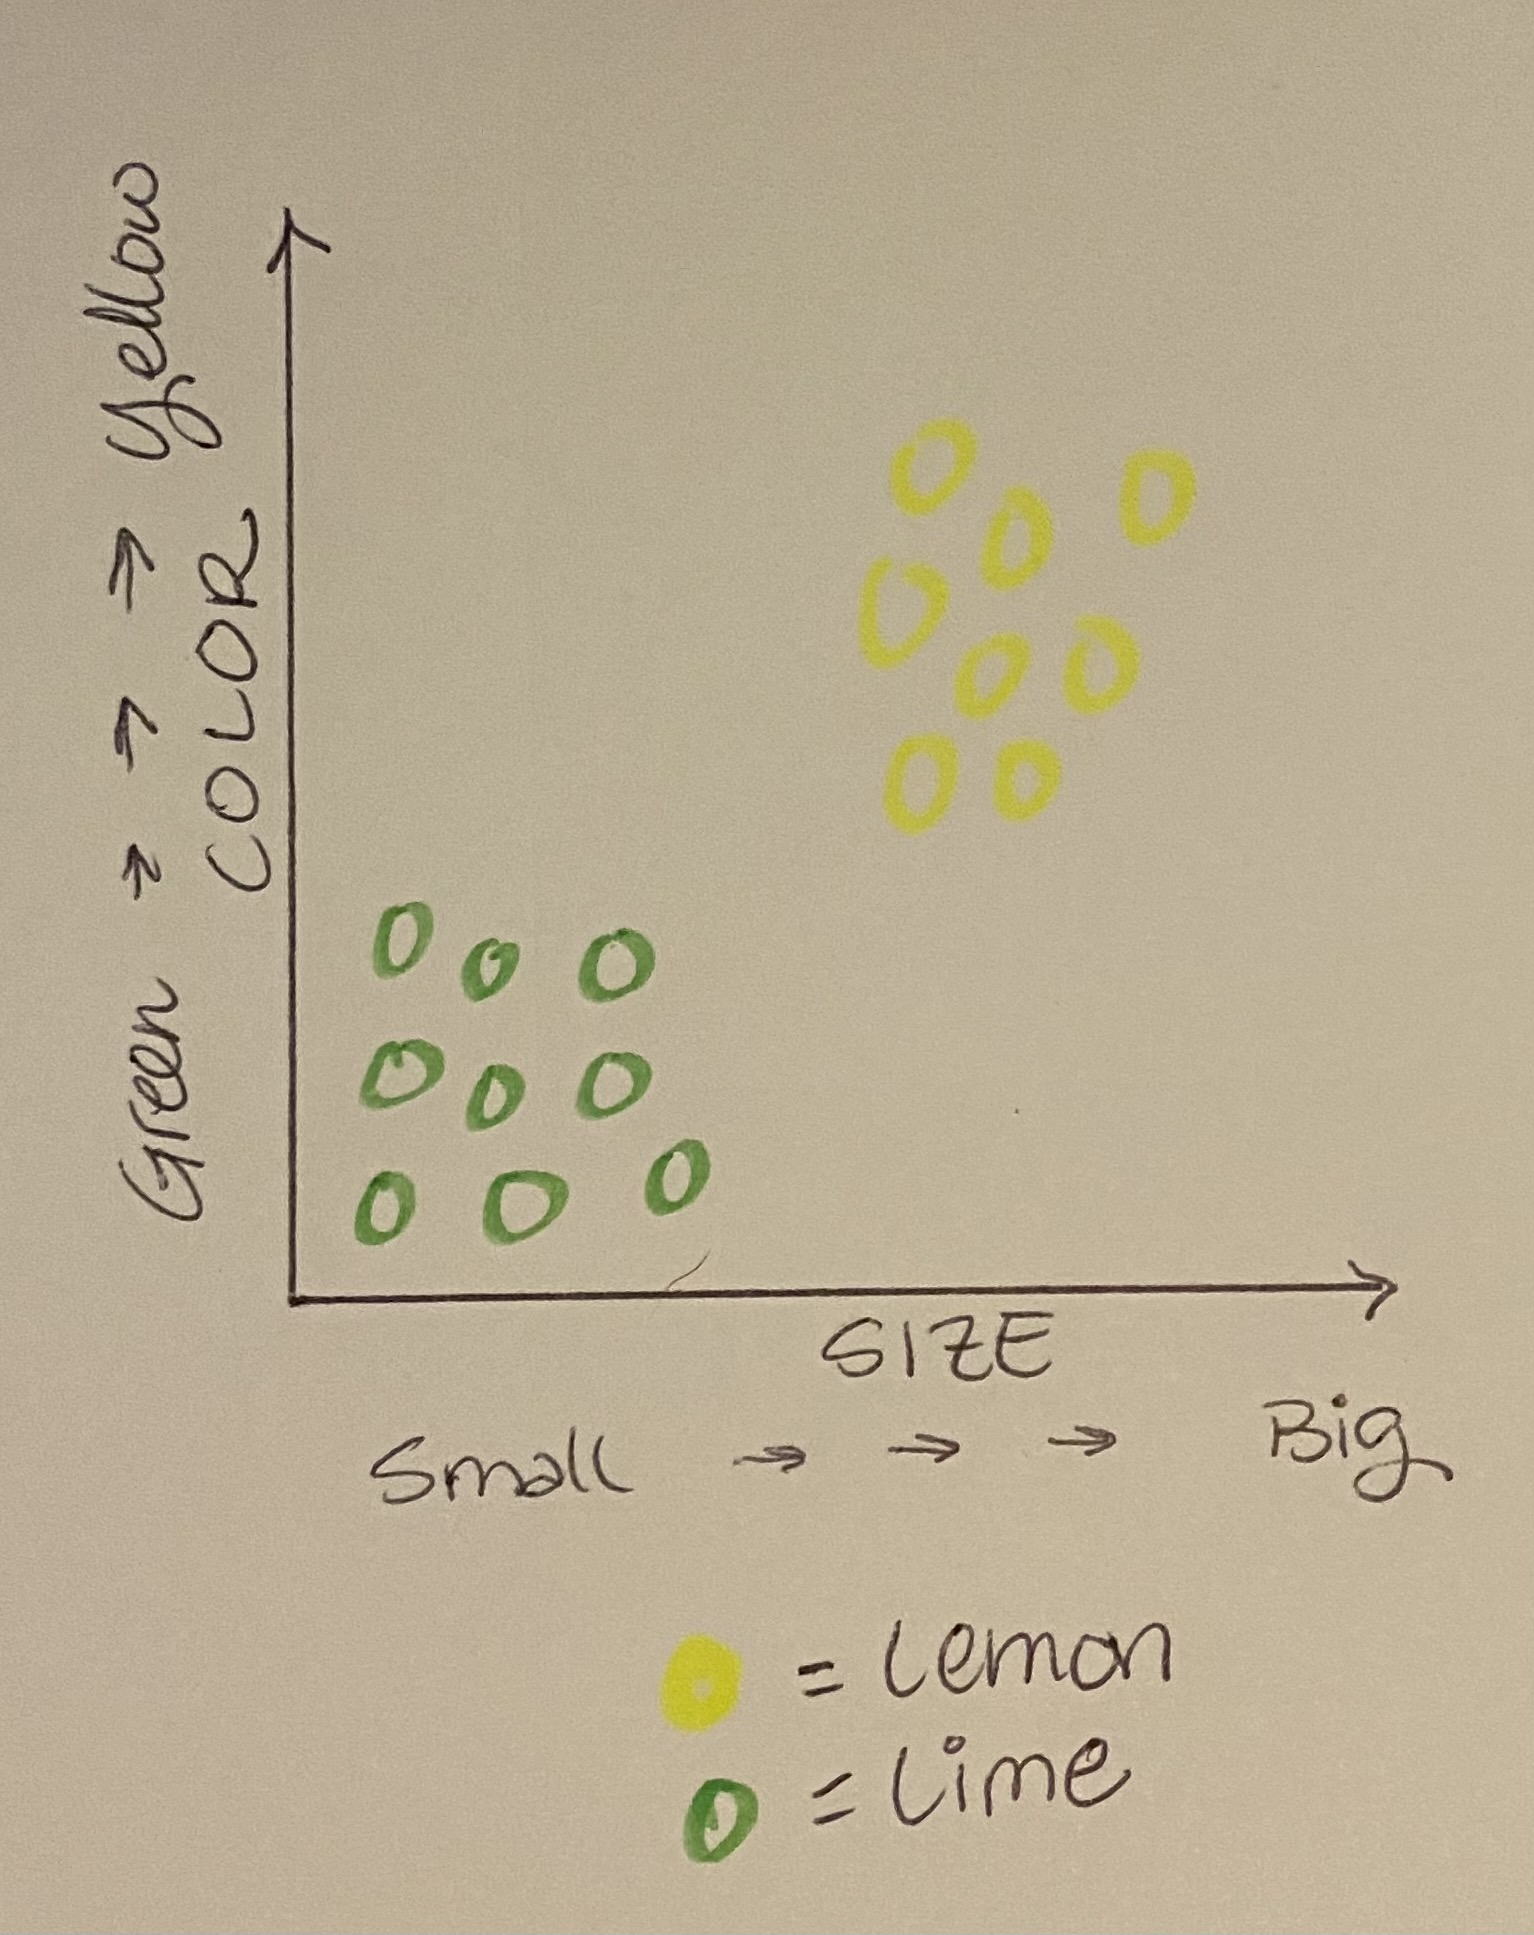

If it's small and green, the graph tells us the fruit is a lime.  If it is big and yellow, it is a lemon.  What else do we see on the graph?  You're right!  All the limes are clustered together and all the lemons are clustered together.  

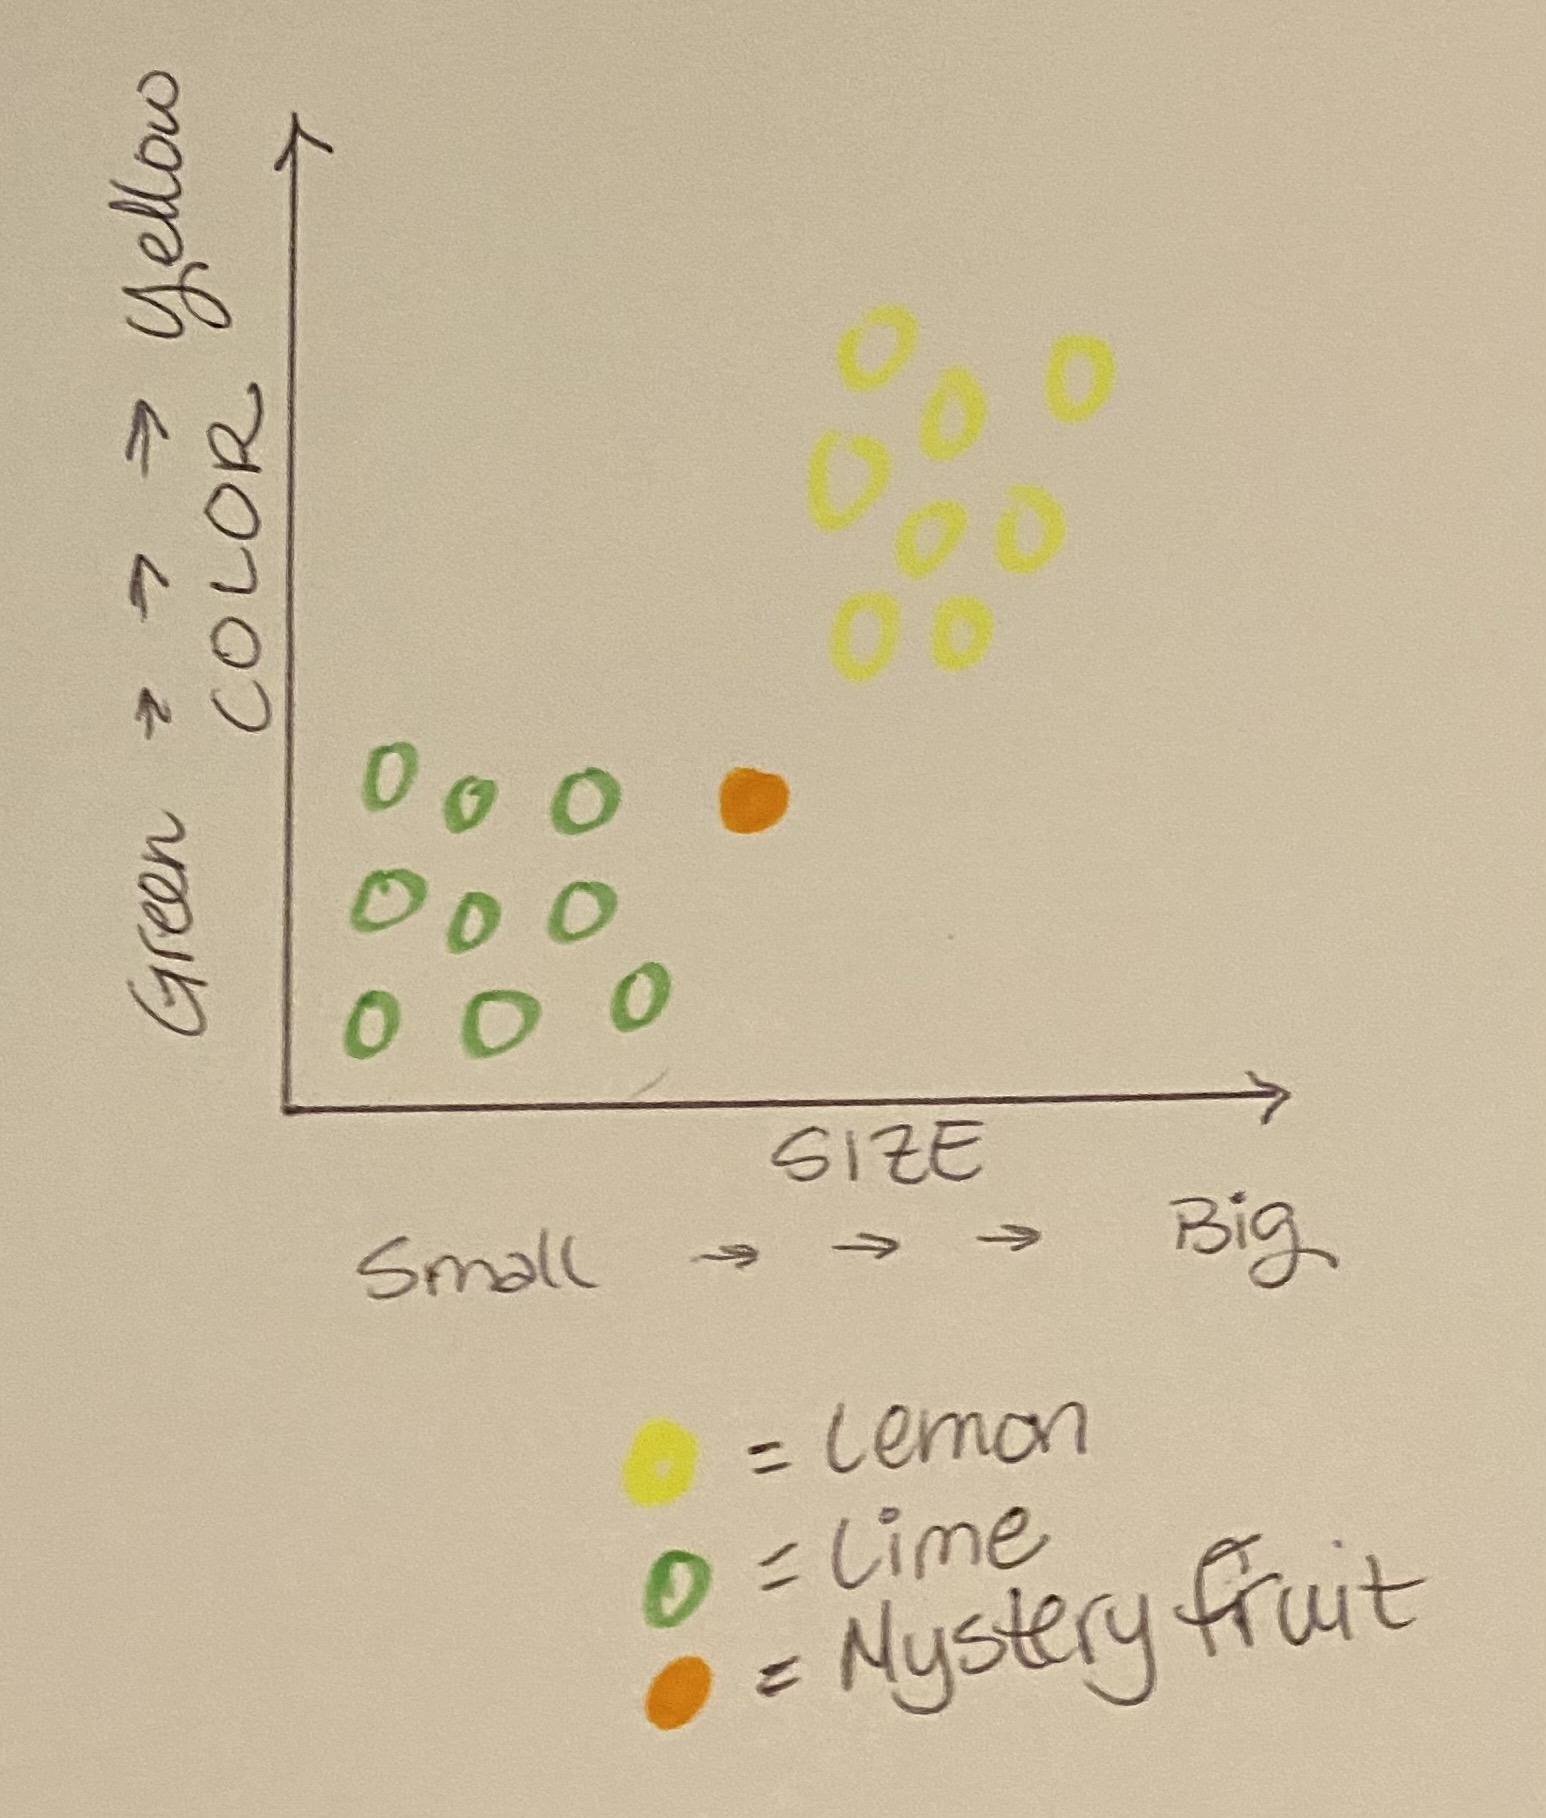

Now we take a look at your mystery fruit.  Can you tell by looking at the graph whether it's a lemon or a lime?  Try looking at it's nearest neighbors, the closest fruits in straight line distance from it's spot on the graph.


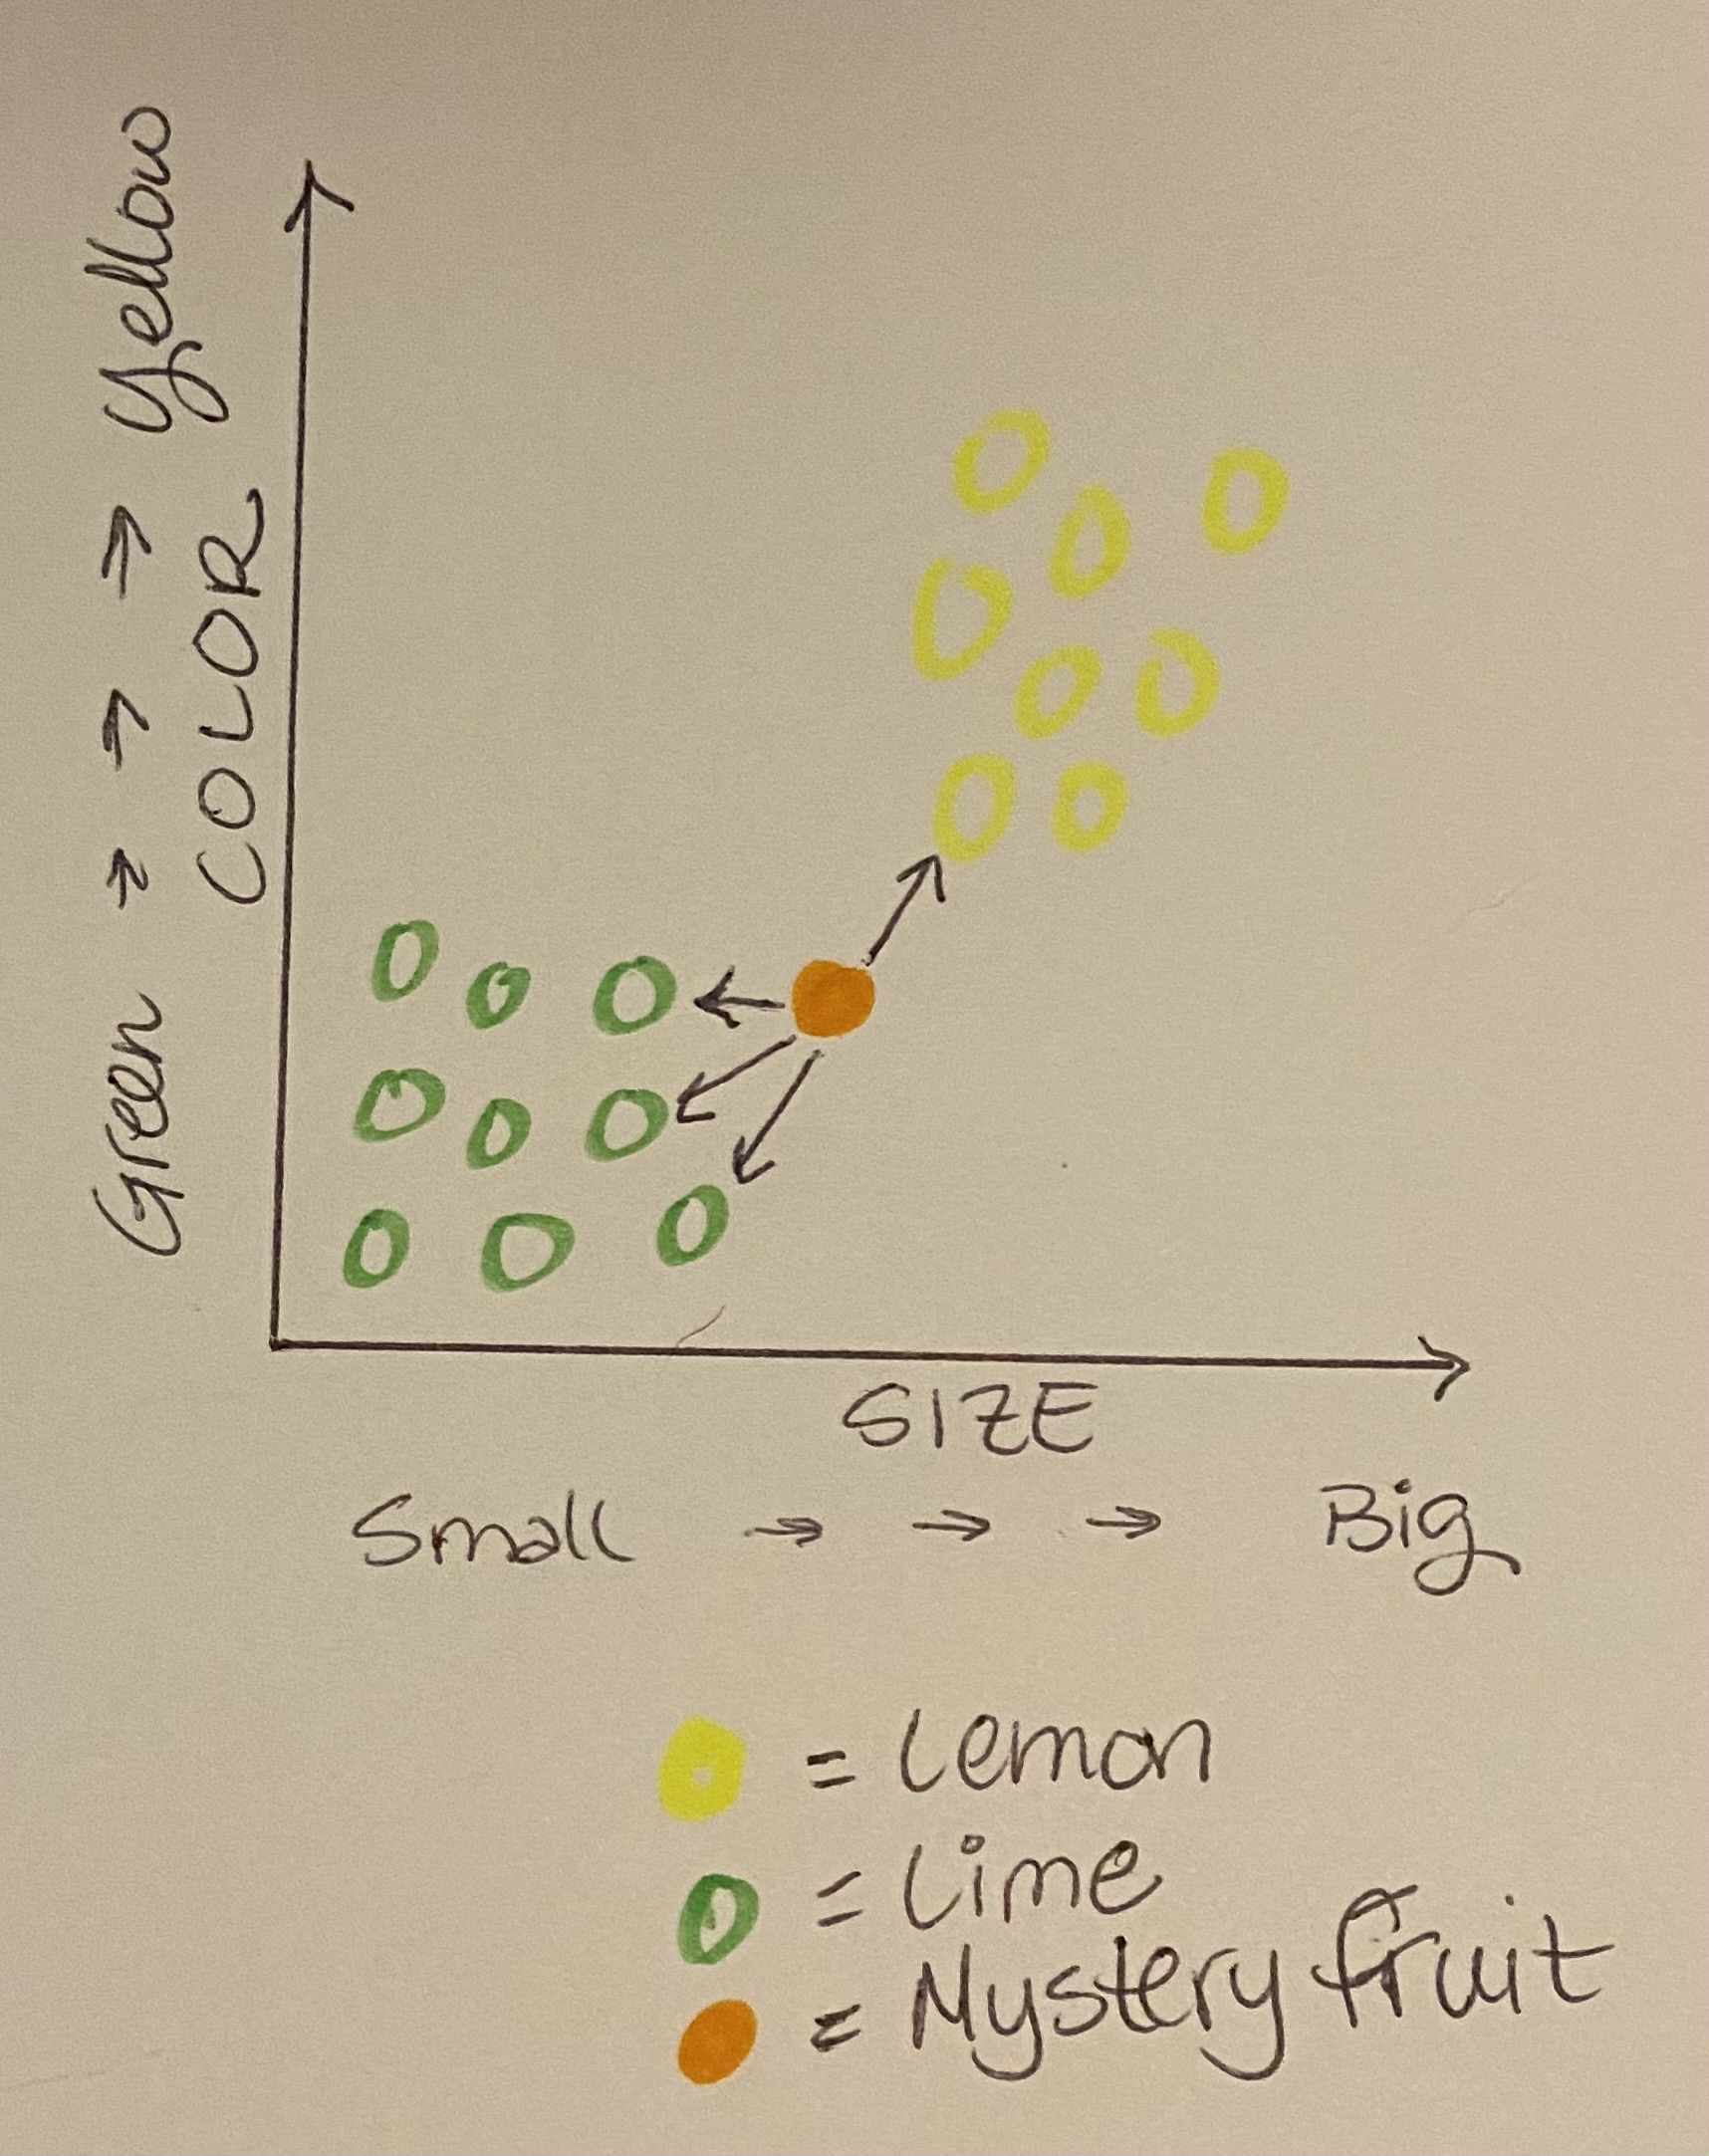

Notice that more of the neighbors are limes than lemons.  So, your mystery fruit is probably a lime.  Whoo Hoo!  you just used the K-Nearest Neighbors to classify your mystery fruit.  



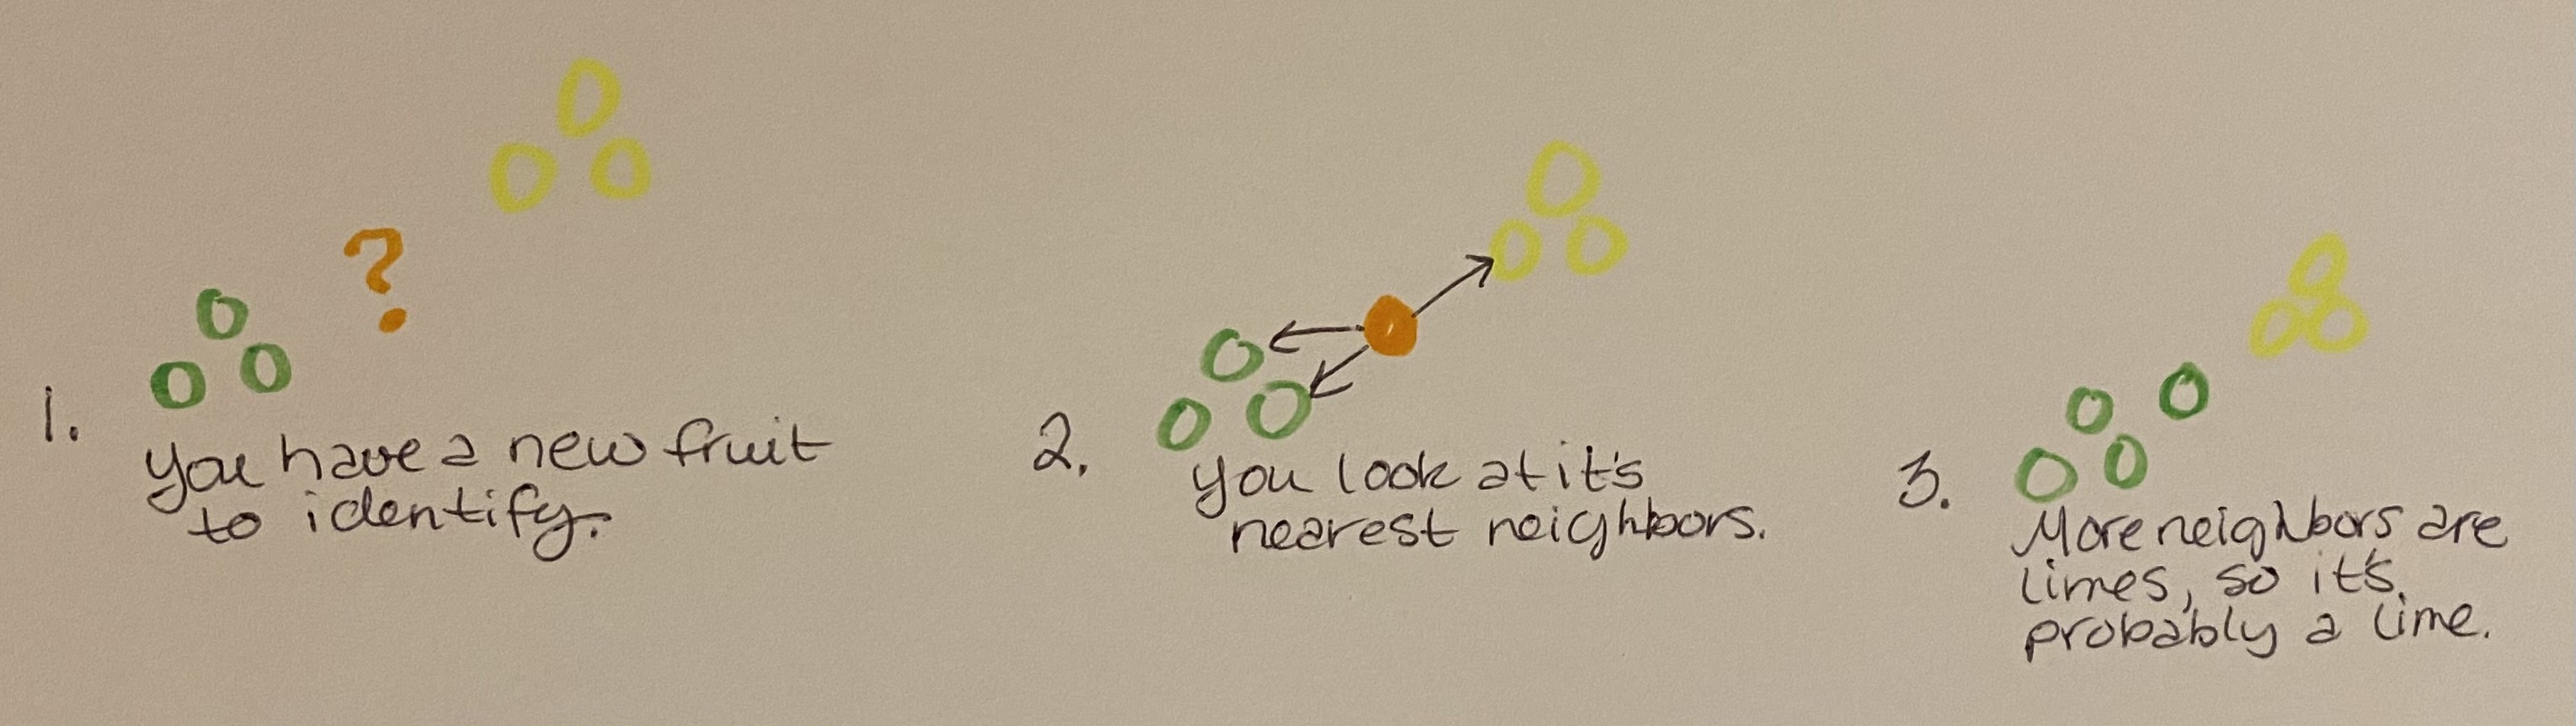

In theory, the algorithm is pretty simple.  It is also extremely useful.  

####Build a K-NN Algorithm from Scratch Using a Python Class


**EDA**

Before we begin lets take a quick look at the [Iris](https://archive.ics.uci.edu/ml/datasets/iris) dataset we use. The Iris dataset contains descriptive information on three species of Irises (the plant). We use this dataset because we are able to use multiple measurements to solve the taxonomic problem:  *"Given the measurements of an mystery iris, can we classify it?"*  

Let's see if we can identify some relationships or patterns in the measurement data before we begin.  

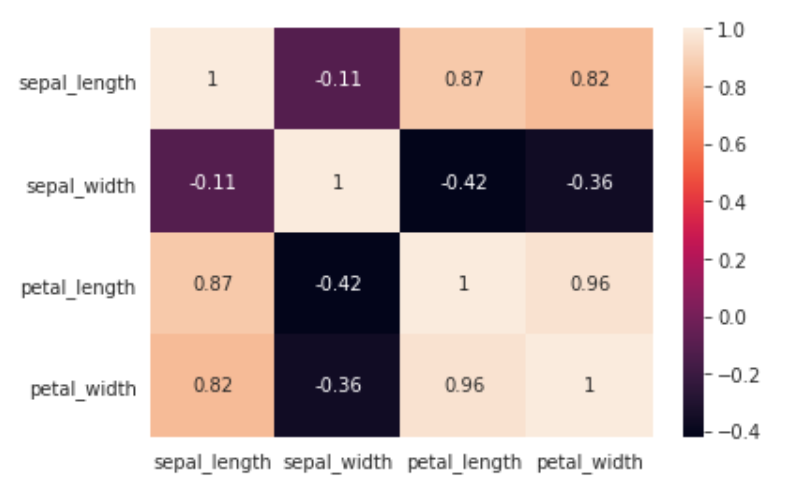

We use the Seaborn library to map the correlations between features.  A positive correlation tells us that the two elements have a positive linear relationship.  So, as one measurement increase, the other measurement also increases.  If a negative correlation exists, there is an inverse relationship where one measurement increases and the other deacreases.  The closer to `1` or `-1` a number is, the stronger the correlation (linear relationship) between the two elements, regardless of whether it's positive or negative. 

We observe the strongest correlations to be (in order):
1.   petal_width & petal_length
2.   sepal_length & petal_length
3.   petal_width & sepal_length
3.   sepal_length & petal_width


We note that petal length and width are the most highly correlated with the class.  This means that irises in the Iris Virginica class have the longest and widest petals of the three classes of irises in the dataset.  Let's take a look at a broad overview of the inter correlation of all of these features.


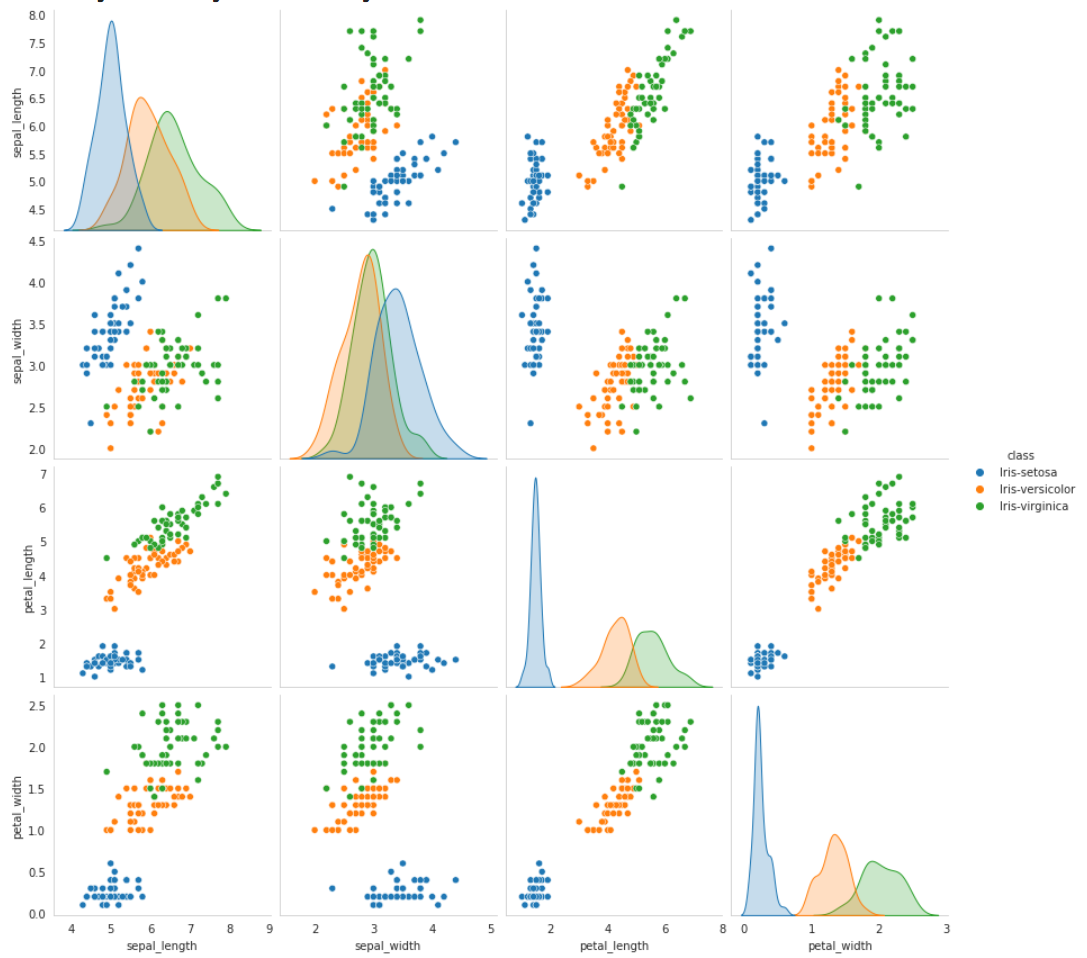

Pair plots allow you to see both distribution of individual variables (across the diagonal) and the relationships between two variables within a multi-classification dataset.  This is extremely useful in helping us frame our solution to the business problem since we can't visualize in 4 dimensions or higher.  

What we observe in the pair plot:
- a separation of the class Iris Setosa in distribution
- distiction between classes in petal_length and petal_width

What we infer from the pair plot:
- if `0 <= petal_length <= 2 and 0 <= petal_width <= 0.7`, the iris is identified as Iris Setosa
- if `2 <= petal_length <= 5.2 and 1 <= petal_width <= 1.7`, the iris is identified as Iris Versicolor
- if `None` of these is true, the iris is identified as Iris Virginica

Now that we have a good idea of what our data looks like and what is actually represents, we can begin to develop our model.


**Modeling**

As we noted in our exploration of the data, the features are stronly linearly correlated yet have differences in distributions among classes.  The K-NN algorithm makes predictions by calculating similarities between each instance, in this case, each flower and it's measurements, making it the ideal first attempt algorithim to use to solve mystery flower problem.

Let's build our algorithm.

To reproduce the From Scratch model will need to import the following libraries:

- [import Pandas as pd](https://pandas.pydata.org/docs/user_guide/index.html#user-guide)
- [import numpy as np](https://numpy.org/doc/1.20/)
- [import seaborn as sns](https://seaborn.pydata.org/)

Note: The loading of the dataset using the Pandas library is not displayed in this article.

We first build a KNearestNeigbors [Python class object](https://docs.python.org/3/tutorial/classes.html?highlight=inheritance#classes) (K-NN)that will hold all of our code.  Think of it as the ultimate organizer and top level of heirarchy. We load our K-NN instance object using with fields using the `__init__` method



```
class KNearestNeighbors(object):
  def __init__(self, k):
    self.k = k
```



We create a K-NN instance method to split our dataset into our training dataset and our testing dataset.  The benefit of using the Python class structure is that the instance method behaves just like a function but also has access to class and instance scope through `self`.  



```
  def train_test_split(self, dataset, test_size=0.33):
    n_test = int(len(dataset) * test_size)
    test_set = dataset(n_test)
    train_set = []
    for idx in dataset.index:
      if idx in test_set.index:
        continue
        train_set.append(dataset.iloc[idx])

    train_set = pd.DataFram(train_set).astype(float).values.tolist()
    test_set = test_set.astype(float).values.tolist()

    return train_set, test_set

```



Because the classification of our mystery iris is unknown, we need to calculate the distances between it and other flowers in the training set. The easiest way (as long as you know the number of dimensions) is by using Euclidean distance or straight-line distance as seen in this formula:

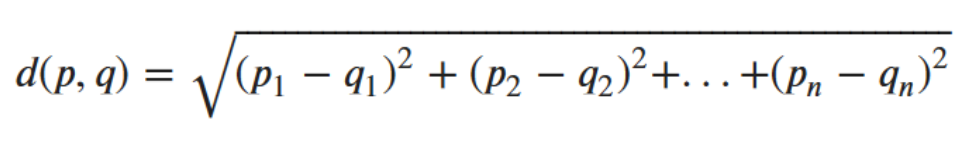

Luckily in Python, you don't have to know the number of dimensions beforehand:  



```
  def euclidean_dist(v1, v2):
    v1, v2 = np.array(v1), np.array(v2)
    distance = 0
    for i in range(len(v1) -1):
      distance += (v1[i] - v2[i]) **2

    return np.sqrt(distance)
  
```



In our predict method, we implement the algorithm's ability to classify.  You may notice there are a few more steps in this method than in our previous ones. Inside the predict method we:
1. Utilize our `euclidean_dist()` method to calculate the distance between the `test_instance` and each row of the `train_set`
2. `Sort` the distances from lowest to highest by value
3. Keep the `k` smallest distance
4. Get the values of a class variable for `train_set` rows with `k` smallest distance - these are the values of the nearest neighbors to our mystery flower and have the most similar features
5. Determine majority class among `train_set` rows with `k` smallest - this is our classification prediction
6. `Return` prediction as sorted classes - hands the value back to the caller









```
  def predict(self, train_set, test_instance):
    distances = []
    for i in range(len(train_set)):
      dist = self.euclidean_dist(train_set[i][:-1], test_instance)
      distances.append((train_set[i], dist))
      distances.sort(key=lambda x: x[1])

    neighbors = []
    for i in range(self.k):
      neighbors.append(distances[i][0])

    classes = {}
    for i in range(len(neighbors)):
      response = neighbors[i][-1]
      if response in classes:
        classes[response] +=1
      else:
        classes[response] =1

      sorted_classes = sorted(classes.items(), key=lambda x: x[1], reverse=True)
      return sorted_classes[0][0]

```



Let's test our algorithm to se how well it performed on the training data.



```
  def evaluate(y_true, y_pred):
      correct = 0
      for actual, pred in zip(y_true, y_pred):
        if actual == pred:
          correct +=1
          return correct / len(y_true)

```





```
train_set, test_set = train_test_split(dataset)
print(len(train_set), len(test_set))

knn = KNearestNeighbors(k=3)
preds = []

for row in test_set:
  preds_only = row[:-1]
  prediction = knn.predict(train_set, preds_only)
  preds.append(prediction)

actual = np.array(test_set)[:, -1]
knn.evaluate(actual, preds)

print(knn.evaluate)

k_evaluations = []

for k in range(1, 26, 2):
  knn = KNearestNeighbors(k=k)
  preds = []

  for row in test_set:
    preds_only = row[:-1]
    prediction = knn.predict(train_set, preds_only)
    preds.append(prediction)

  curr_accuracy = knn.evaluate(actual, preds)
  k_evaluations.append((k, curr_accuracy))

print(k_evaluations)
# 0.967 is a good score for this dataset

```
Accuracy Score: 0.9459459459459459

Cross-validation Score: 0.972972972972973

The From Scratch model is performing well with an accuracy score of `0.9459` and a cross-validation score of `0.9729`.  This means the model is predicting the correct class for the flower about `96%` of the time. At this point we would normally iterate on the model, hypertuning pararmeters until we optimize effieciencies within the model to achieve optimal performance.  However, today we will look at the same algorithim implemented using the SciKit-Learn library. 

#### Test From Scratch K-NN Algorithm Against SciKit Learn K-NN Algorithm


SciKit-Learn is a free software machine learning library for the Python Programming language.  It contains efficient tools for machine learning and statistical modeling such as classification, regression, clustering, and dimensionality reduction.

To reproduce the SkiKit-Learn model will need to import the following packages:

- [from sklearn.datasets import load_iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)
- [from sklearn.pipeline import make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)
- [from sklearn.model_selection import train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- [from sklearn.preprocessing import MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
- [from sklearn.neighbors import NeighborhoodComponentsAnalysis](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NeighborhoodComponentsAnalysis.html)
- [from sklearn.neighbors import KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
- [from sklearn.metrics import accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
- [from sklearn.model_selection import cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

Note: The loading of the dataset using the SkiKit-Learn package is not displayed in this article.

The following model is operating within a K-NN Python class.  It is set up just like we did in our From Scratch algorithm.



```
n_neighbors = 3
random_state = 42

# load dataset
X = dataset
y = dataframe["class"]

# split into train/test set
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.67, random_state=42, stratify = y)

# reduce dimensions to 2 with neighborhood component analysis
nca = make_pipeline(
    MinMaxScaler(),
    NeighborhoodComponentsAnalysis(n_components=2, 
                           random_state=random_state)
    )

# use nearest neighbor classifier to evaluate  the methoda
knn =  KNeighborsClassifier(n_neighbors=n_neighbors)

# fit the method's model
nca.fit(X_train, y_train)

# fit nearest neighbor classifier on training set
knn.fit(nca.transform(X_train), y_train)

# predict the class labels for the provided data
knn.predict(nca.transform(X_train))

# return probability estimates for the test data
knn.predict_proba(nca.transform(X_test))

# calculate the nearest neighbor accuracy on the test set
knn_accuracy_sklearn = knn.score(nca.transform(X_test), y_test)

# calculate the nearest neighbor cross validation score on test set
scores = cross_val_score(knn, X_train, y_train, cv=5)

print(f'Accuracy Score: {knn_accuracy_sklearn}')
print(f'Cross-validation Score: {np.mean(scores)}')
# 0.967 is a good score for this dataset
```
Accuracy Score: 0.9702970297029703

Cross-validation Score: 0.9800000000000001


The SciKit-Learn model is performing well with an accuracy score of `0.9702` and a cross-validation score of `0.98`.  This means the model is predicting the correct class for the flower about `97.5%` of the time. 



---
## K-NN Machine Learning Use Cases
#### ...And Limitations

---



As you observed in the demonstration above, K-NN is a fairly straight-forward algorithm that makes your model more intelligent.  This is the magic of machine learning!  You may be wondering, "What are some real-world applications for K-NN other than taxonomy?"

#### Recommender Systems

Think about [Netflix](https://medium.com/@springboard_ind/how-netflixs-recommendation-engine-works-bd1ee381bf81#:~:text=For%20every%20new%20subscriber%2C%20Netflix,they%20would%20like%20to%20watch.&text=Netflix's%20machine%20learning%20based%20recommendations,the%20scenes%20and%20refreshes%20it.), [Spotify](https://towardsdatascience.com/how-spotify-recommends-your-new-favorite-artist-8c1850512af0#:~:text=Well%2C%20Spotify's%20recommender%20system%20provides,it%20deems%20%E2%80%9Csimilar%E2%80%9D%20users.), or [The New York Times App](https://open.nytimes.com/how-the-new-york-times-is-experimenting-with-recommendation-algorithms-562f78624d26).  What do they all have in common?  They recommend movies, songs, or news articles to you.  How do they figure out which ones to recommend to you?  This is a business problem with a K-NN componet to the solution.  They collect information on your preferences, group you with people with similar preferences, make recommendations to you based on the closest users to you. K-NN may be part of the overall algorithm and used only as a jumping off point, and the logic is at the core of the solution process. 

#### OCR

[OCR](https://docparser.com/blog/what-is-ocr/) stands for optical character recognition.  It allows your computer to read a page of text as an image and then translate it to text.  While this is a complex task, it's built on simple logic.  Part of the logic includes measureing and extracting features like lines, points and curves from two characters, like a 1 and 3.  You then compare the features of each character to know characters and each other in order to classify the characters. This too involves the K-NN logic.


#### Limitations

Predicting the weather or the stock market are extremely challenging because so many variables are involved.  There is no linear correlation in either spheres that would allow us to use past data to predict future performance.  Any such industry or sphere  heavily influenced by randomness or ambiguity is not a candidate for K-NN logic.

---
## K-NN Challenge

---



Complete this exercise on your own:

- using cosine distance instead of euclidean distance
- standardize the data (for practice for real-world data sets where you will need to do this more often than not)
- post links to your project(s) in the comments and tells me about your experience; what did you find easy/hard, what did you learn, what were your results, etc.

I hope this gives you a foundation or fills in a few gaps regarding K-Nearest Neighbors and Machine Learning.  

My Papaw always told me I'd be judged by the company I kept.  I wonder what he would think about K-NN!